# 1. Информация о датасете

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.proportion import proportions_ztest
from scipy.stats import norm

In [2]:
df = pd.read_csv('diabetes_012_health_indicators_BRFSS2015.csv')

In [3]:
df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

Diabetes_012 - Диабет (0 = нет диабета, 1 = преддиабет, 2 = диабет)

HighBP - Высокое давление (0 = нет, 1 = есть)

HighChol - Высокий холестерин (0 = нет, 1 = есть)

CholCheck - Проверка холестерина за последние 5 лет (0 = не проверял, 1 = проверял)

BMI - Индекс массы тела (ИМТ)

Smoker - Курильщик (выкурил ли хотя бы 100 сигарет за всю жизнь) (0 = нет, 1 = да)

Stroke - Инсульт (0 = не было, 1 = было)

HeartDiseaseorAttack - Болезнь сердца или инфаркт (0 = нет, 1 = есть)

PhysActivity - Физическая активность за последние 30 дней (не включая работу) (0 = нет, 1 = да)

Fruits - Употребление фруктов 1+ раз в день (0 = нет, 1 = да)

Veggies - Употребление овощей 1+ раз в день (0 = нет, 1 = да)

HvyAlcoholConsump - Злоупотребление алкоголем (мужчины: более 14 порций в неделю, женщины: более 7 порций) (0 = нет, 1 = да)

AnyHealthcare - Наличие медицинской страховки (0 = нет, 1 = есть)

NoDocbcCost - Не мог обратиться к врачу из-за стоимости в последние 12 месяцев (0 = нет, 1 = да)

GenHlth - Общая оценка здоровья (шкала 1-5: 1 = отлично, 2 = очень хорошо, 3 = хорошо, 4 = удовлетворительно, 5 = плохо)

MentHlth - Дней с плохим психическим здоровьем за последние 30 дней (шкала 1-30)

PhysHlth - Дней с плохим физическим здоровьем за последние 30 дней (шкала 1-30)

DiffWalk - Серьезные трудности при ходьбе или подъеме по лестнице (0 = нет, 1 = да)

Sex - Пол (0 = женщина, 1 = мужчина)

Age - Возрастная категория (13 уровней: 1 = 18-24, 9 = 60-64, 13 = 80+)

Education - Уровень образования (шкала 1-6: 1 = не посещал школу, 2 = 1-8 классы, 3 = 9-11 классы, 4 = 12 класс или аттестат, 5 = 1-3 года колледжа, 6 = 4+ года колледжа)

Income - Уровень дохода (шкала 1-8: 1 = менее 10,000, 5 = менее 35,000, 8 = 75,000+)

## Анализ дубликатов

Этот датасет - анонимный опрос BRFSS, поэтому в нем нет персональных идентификаторов.

Мы не можем отличить двух разных людей с одинаковыми характеристиками и технические дубликаты/ошибки.

In [5]:
duplicate_counts = df.groupby(list(df.columns)).size().reset_index(name='count')
duplicates = duplicate_counts[duplicate_counts['count'] > 1]

print(str(len(duplicates)) + ' уникальных комбинаций, которые повторяются')
print('Всего записей-дубликатов: ' + str(duplicates['count'].sum() - len(duplicates)))

11187 уникальных комбинаций, которые повторяются
Всего записей-дубликатов: 23899


В исходном датасете обнаружено 23 899 полных дубликатов (9,4% от общего объёма 253 680 записей). Эти записи представляют собой абсолютно идентичные строки по всем 22 признакам, включая целевой показатель Diabetes_012.

Давайте посмотрим, какова вероятность того, что дубликаты - разные люди

In [6]:
# для бинарных признаков (0/1) - вероятность 0.5
binary_cols = ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke',
               'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
               'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk', 'Sex']

# для категориальных с k категориями - вероятность 1/k
probabilities = {
    'GenHlth': 1/5, # 5 категорий (1-5)
    'MentHlth': 1/31, # 0-30 дней
    'PhysHlth': 1/31, # 0-30 дней
    'Age': 1/13, # 13 возрастных групп
    'Education': 1/6, # 6 уровней образования
    'Income': 1/8, # 8 уровней дохода
    'BMI': 1/50, # примерный диапазон BMI (15-65)
}

# рассчитаем общую вероятность совпадения 22 признаков
prob_binary = 0.5 ** len(binary_cols) # все бинарные признаки совпали
prob_categorical = np.prod(list(probabilities.values())) # все категориальные совпали
prob_total = prob_binary * prob_categorical

print(f"Вероятность совпадения всех бинарных признаков: {prob_binary:.2e}")
print(f"Вероятность совпадения всех категориальных признаков: {prob_categorical:.2e}")
print(f"Общая вероятность совпадения ВСЕХ 22 признаков: {prob_total:.2e}")
print(f"Это 1 шанс из {1/prob_total:.0e}")

Вероятность совпадения всех бинарных признаков: 6.10e-05
Вероятность совпадения всех категориальных признаков: 6.67e-09
Общая вероятность совпадения ВСЕХ 22 признаков: 4.07e-13
Это 1 шанс из 2e+12


При анализе выборки BRFSS 2015 года такие полные совпадения статистически крайне маловероятны для независимых наблюдений. Это указывает на артефакт сбора или обработки данных, а не на реальных пациентов с одинаковыми характеристиками. Удаление этих записей устранит систематическую ошибку и повысит достоверность анализа.

Теперь посмотрим, повлияет ли удаление дубликатов на распределение.

In [7]:
print(f"Всего строк: {len(df)}")
print(f"Полных дубликатов: {len(df[df.duplicated()])}")

# проверим влияние удаления всех дубликатов (оставляем по 1)
df_unique = df.drop_duplicates()
print(f"Было: {len(df)} записей")
print(f"После удаления дубликатов: {len(df_unique)} записей")
print(f"Удалится записей: {len(df) - len(df_unique)}")

# сравним распределение Diabetes_012
before = df['Diabetes_012'].value_counts(normalize=True).sort_index()
after = df_unique['Diabetes_012'].value_counts(normalize=True).sort_index()

print(f"\nРаспределение Diabetes_012:")
print(f"{'Класс':<10} {'ДО':<10} {'ПОСЛЕ':<10} {'Разница':<10}")
for i in range(len(before)):
    diff = after.iloc[i] - before.iloc[i]
    print(f"{before.index[i]:<10} {before.iloc[i]:<10.4f} {after.iloc[i]:<10.4f} {diff:>10.4f}")

Всего строк: 253680
Полных дубликатов: 23899
Было: 253680 записей
После удаления дубликатов: 229781 записей
Удалится записей: 23899

Распределение Diabetes_012:
Класс      ДО         ПОСЛЕ      Разница   
0.0        0.8424     0.8271        -0.0153
1.0        0.0183     0.0201         0.0019
2.0        0.1393     0.1527         0.0134


In [8]:
df = df_unique

Можно сказать "распределение изменилось умеренно", но это все равно значимо для точного анализа. Главный аргумент для удаления — математическая невозможность одинаковых людей, а не величина изменения распределения.

Удаляем не потому что "почти не поменялось", а потому что это технические дубли (вероятность случайности ~10⁻¹³). Они искажают реальную распространённость диабета, нарушают принцип независимости наблюдений для статистических тестов.
То, что распределение изменилось (меньше здоровых профилей, больше диабетиков) — как раз подтверждает необходимость удаления, а не наоборот.

# 2. Анализ целевой переменной (Diabetes_binary)

In [9]:
counts = df["Diabetes_012"].value_counts().sort_index() # считаем количество 0 и 1
perc = (counts / counts.sum() * 100) # считаем доли в процентах

print("Частоты:")
print(counts)
print("\nДоли (%):")
print(perc)

Частоты:
Diabetes_012
0.0    190055
1.0      4629
2.0     35097
Name: count, dtype: int64

Доли (%):
Diabetes_012
0.0    82.711364
1.0     2.014527
2.0    15.274109
Name: count, dtype: float64


**Вывод:**

Анализ частотного распределения целевой переменной Diabetes_012 показывает, что подавляющее большинство наблюдений относится к классу отсутствия диабета (0) - около 84,2% выборки. Доля респондентов с диагностированным диабетом (2) составляет примерно 13,9%, тогда как класс предиабета (1) представлен крайне слабо - около 1,8%.

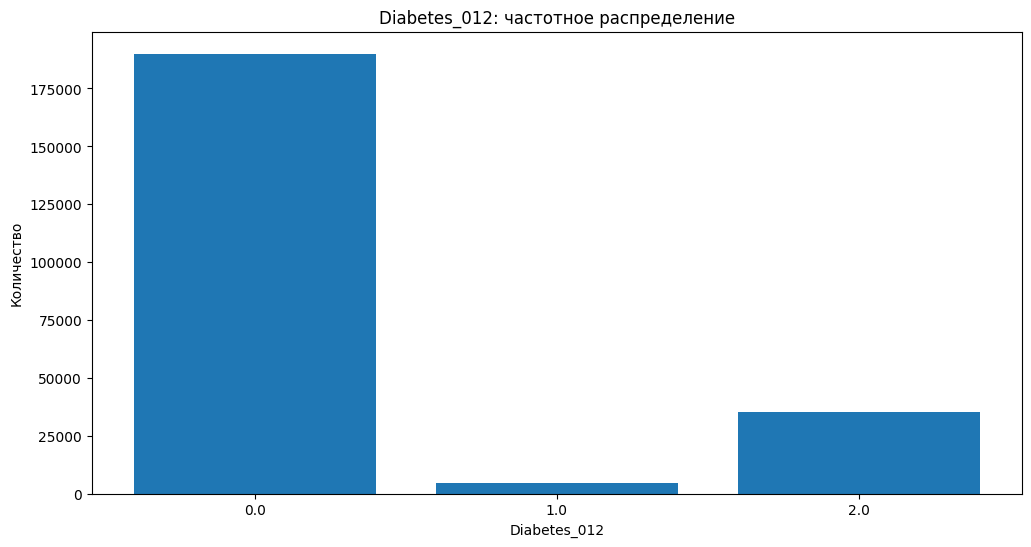

In [10]:
plt.figure(figsize=(12,6))
plt.bar(counts.index.astype(str), counts.values)
plt.title("Diabetes_012: частотное распределение")
plt.xlabel("Diabetes_012")
plt.ylabel("Количество")
plt.show()

**Вывод:**

Видим, что распределение целевой переменной является сильно несбалансированным. В частности, класс предиабета является редким и существенно уступает по численности как здоровой группе, так и группе с диагностированным диабетом.

(для корректной проверки гипотез и интерпретации эффектов важно использовать относительные показатели (доли, вероятности), а также методы, устойчивые к несбалансированным данным)

# 3. Анализ демографии

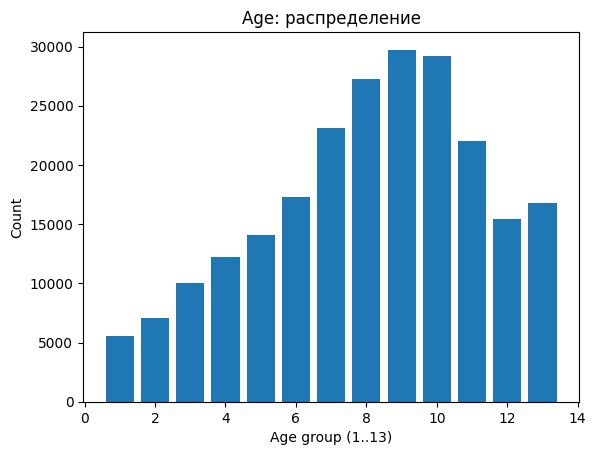

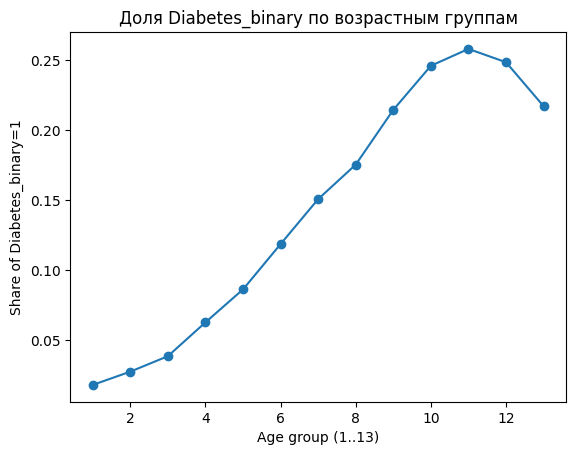

In [11]:
df['Diabetes_binary'] = (df['Diabetes_012'] > 0).astype(int)  # 1=предиабет/диабет,0=нет
age = df['Age'] # возрастные группы (1..13)
y = df['Diabetes_binary'] # целевая

# Распределение Age
age_counts = age.value_counts().sort_index() # частоты по возрастным группам
plt.figure()
plt.bar(age_counts.index, age_counts.values) # столбики по группам
plt.title('Age: распределение')
plt.xlabel('Age group (1..13)')
plt.ylabel('Count')
plt.show()

# Доля Diabetes_binary по возрастным группам
rate_by_age = df.groupby('Age')['Diabetes_binary'].mean() # доля 1 в каждой группе
plt.figure()
plt.plot(rate_by_age.index, rate_by_age.values, marker='o') # линия долей
plt.title('Доля Diabetes_binary по возрастным группам')
plt.xlabel('Age group (1..13)')
plt.ylabel('Share of Diabetes_binary=1')
plt.show()

**Вывод:**

Распределение по возрастным группам не является равномерным: в выборке доминируют респонденты среднего и пожилого возраста. Наибольшее число наблюдений приходится на возрастные группы примерно 7–10, после чего численность постепенно снижается. Это важно учитывать при интерпретации результатов, так как абсолютные количества в старших группах частично отражают структуру выборки, а не только медицинские эффекты.

Доля людей с предиабетом/диабетом монотонно растёт с возрастом.
В младших возрастных группах (Age = 1–3) доля Diabetes_binary=1 составляет менее 4%, тогда как начиная с возр. группы 8 она превышает 15%, а в группах 10–12 достигает 22–24%. Это указывает на сильную положительную связь возраста с вероятностью наличия диабета или предиабета.

<Figure size 640x480 with 0 Axes>

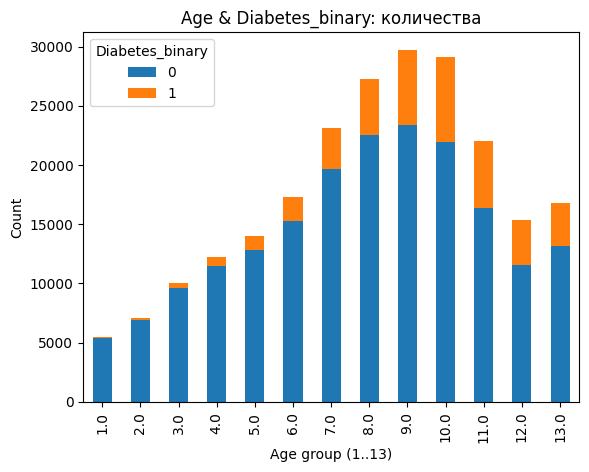

Доли Diabetes_binary внутри каждой Age-группы (%)
Diabetes_binary      0      1
Age                          
1.0              98.20   1.80
2.0              97.26   2.74
3.0              96.15   3.85
4.0              93.73   6.27
5.0              91.37   8.63
6.0              88.13  11.87
7.0              84.92  15.08
8.0              82.45  17.55
9.0              78.53  21.47
10.0             75.38  24.62
11.0             74.18  25.82
12.0             75.13  24.87
13.0             78.28  21.72


In [12]:
# Совместное распределение Age - Diabetes_binary
joint = pd.crosstab(df['Age'], df['Diabetes_binary']) # таблица частот Age и класс
joint_pct = pd.crosstab(df['Age'], df['Diabetes_binary'], normalize='index') * 100 # доли внутри Age

plt.figure()
joint.plot(kind='bar', stacked=True) # стек по классам
plt.title('Age & Diabetes_binary: количества')
plt.xlabel('Age group (1..13)')
plt.ylabel('Count')
plt.legend(title='Diabetes_binary')
plt.show()

print('Доли Diabetes_binary внутри каждой Age-группы (%)')
print(joint_pct.round(2)) # таблица процентов

**Вывод:**

Анализ совместного распределения показывает, что рост абсолютного числа случаев диабета обусловлен не только увеличением численности старших возрастных групп, но и реальным ростом относительного риска внутри каждой возрастной группы.

Даже там, где общее число наблюдений начинает снижаться (Age 11-13), доля Diabetes_binary=1 остаётся высокой, что подтверждает возраст как независимый фактор риска.

**С точки зрения бизнеса:**

Группы 55+ (примерно Age >= 7) - ключевая целевая аудитория для программ раннего выявления диабета. Именно в этих группах максимальный потенциальный эффект от профилактических интервенций (скрининг, lifestyle-программы, физическая активность). Младшие возрастные группы могут рассматриваться как зона долгосрочной профилактики, но не как приоритет для выявления текущих случаев.

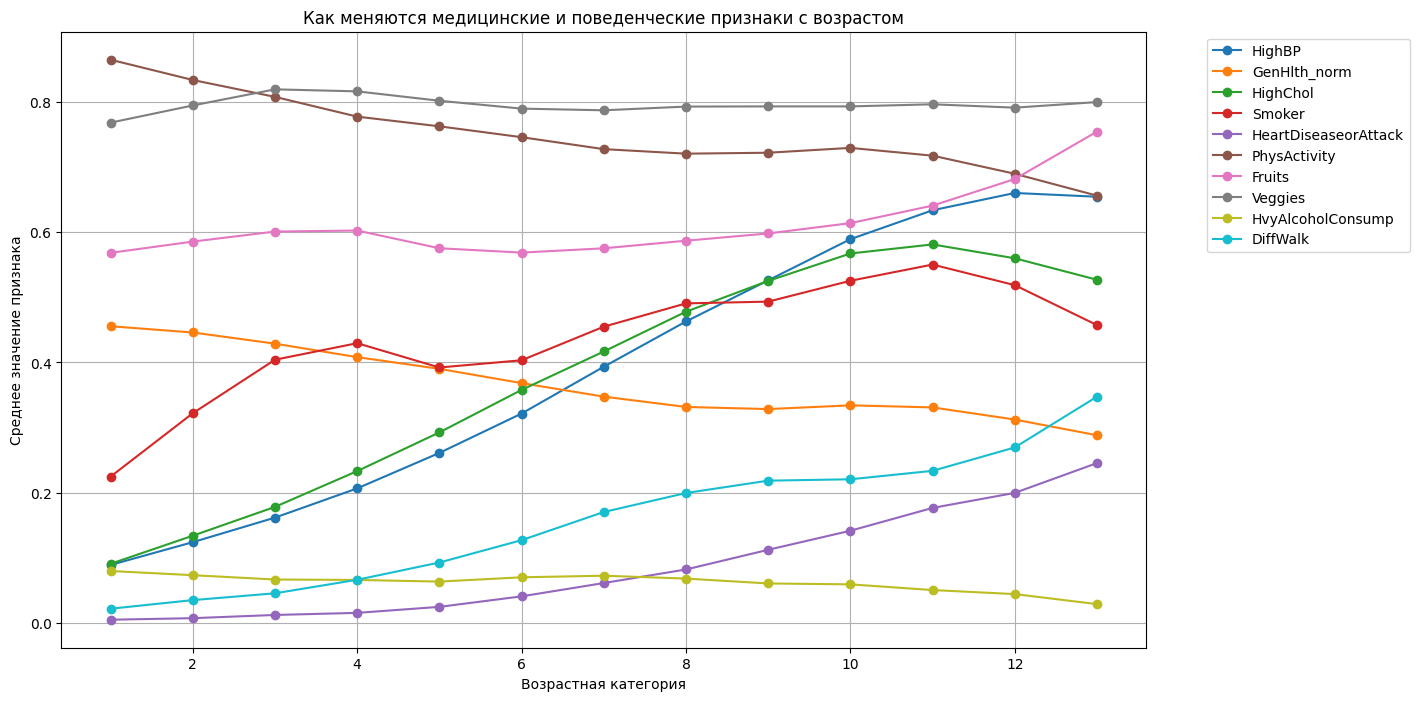

In [13]:
#список факторов для анализа
df['GenHlth_norm'] = (5- df['GenHlth'] - 1) / 4
features = ['HighBP', 'GenHlth_norm', 'HighChol', 'Smoker',
               'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
               'HvyAlcoholConsump','DiffWalk']

#группирую по возрасту
age_means = df.groupby('Age')[features].mean().reset_index()

plt.figure(figsize=(14,8))
for feature in features:
    plt.plot(age_means['Age'], age_means[feature], marker='o', label=feature)

plt.xlabel('Возрастная категория')
plt.ylabel('Среднее значение признака')
plt.title('Как меняются медицинские и поведенческие признаки с возрастом')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

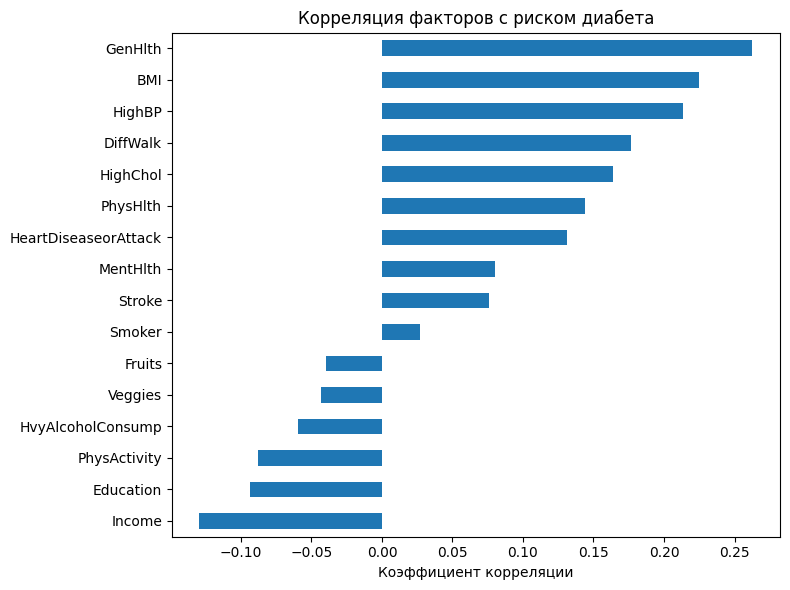

In [14]:
from sklearn.linear_model import LinearRegression

features = [
    "HighBP", "HighChol", "BMI", "Smoker", "Stroke",
    "HeartDiseaseorAttack", "PhysActivity", "Fruits", "Veggies",
    "HvyAlcoholConsump", "GenHlth", "MentHlth", "PhysHlth",
    "DiffWalk", "Education", "Income"
]
partial_corr = {}

for feature in features:
    #убираю влияние возраста из признака
    reg_x = LinearRegression()
    reg_x.fit(df[["Age"]], df[feature])
    x_resid = df[feature] - reg_x.predict(df[["Age"]])

    #убираю влияние возраста из диабета
    reg_y = LinearRegression()
    reg_y.fit(df[["Age"]], df["Diabetes_binary"])
    y_resid = df["Diabetes_binary"] - reg_y.predict(df[["Age"]])
    #корреляция остатков
    partial_corr[feature] = x_resid.corr(y_resid)

partial_corr = (pd.Series(partial_corr).sort_values())

partial_corr
plt.figure(figsize=(8, 6))
partial_corr.plot(kind="barh")
plt.title("Корреляция факторов с риском диабета")
plt.xlabel("Коэффициент корреляции")
plt.tight_layout()
plt.show()

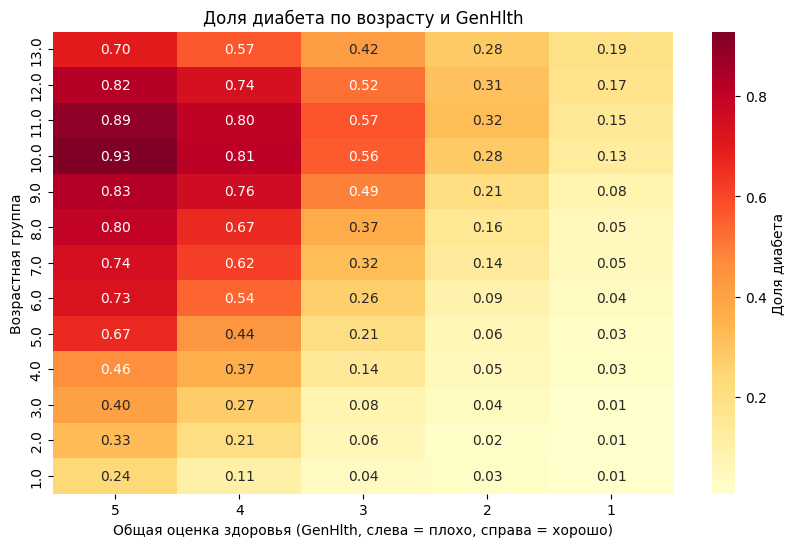

In [15]:
#упорядочим GenHlth, чтобы 1-лучше, 5-хуже
df["GenHlth"] = df["GenHlth"].astype(int)
age_genhlth_diabetes = df.groupby(["Age", "GenHlth"])["Diabetes_012"].mean().reset_index()

pivot_table = age_genhlth_diabetes.pivot(index="Age", columns="GenHlth", values="Diabetes_012")
plt.figure(figsize=(10,6))
sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap="YlOrRd", cbar_kws={'label': 'Доля диабета'})
plt.title("Доля диабета по возрасту и GenHlth")
plt.xlabel("Общая оценка здоровья (GenHlth, слева = плохо, справа = хорошо)")
plt.ylabel("Возрастная группа")
plt.gca().invert_yaxis()  #младшие снизу, старшие сверху
plt.gca().invert_xaxis()  #чтобы справа были здоровые, слева плохое здоровье
plt.show()

# 4. Частотные распределения (Income, NoDocbcCost, AnyHealthcare)

Income
1.0     4.261449
2.0     5.116611
3.0     6.929207
4.0     8.685226
5.0    11.030068
6.0    15.232330
7.0    17.490132
8.0    31.254978
Name: proportion, dtype: float64


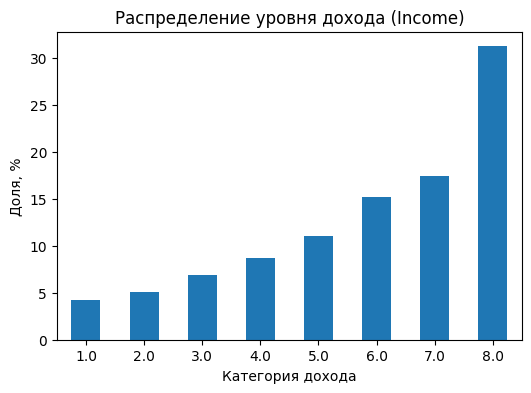

NoDocbcCost
0.0    90.718989
1.0     9.281011
Name: proportion, dtype: float64


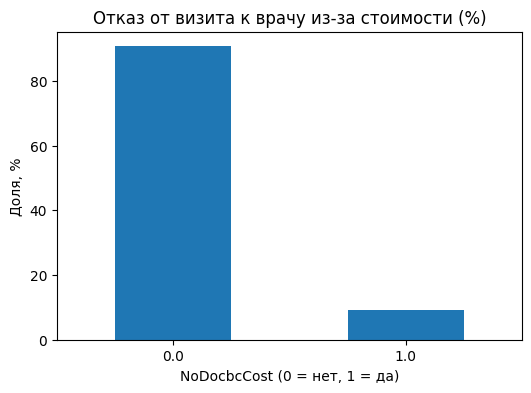

AnyHealthcare
1.0    94.607474
0.0     5.392526
Name: proportion, dtype: float64


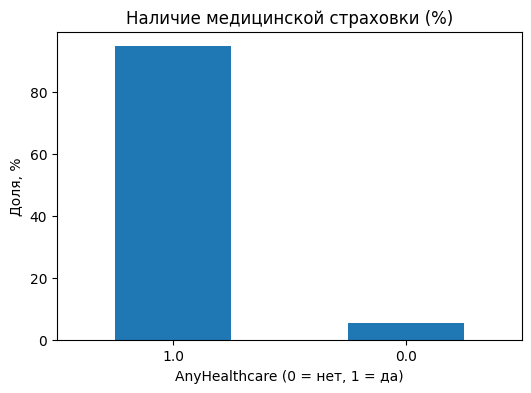

In [16]:
#Income
income_dist_pct = df['Income'].value_counts(normalize=True).sort_index() * 100
print(income_dist_pct)

income_dist_pct.plot(kind='bar', figsize=(6, 4))
plt.title('Распределение уровня дохода (Income)')
plt.xlabel('Категория дохода')
plt.ylabel('Доля, %')
plt.xticks(rotation=0)
plt.show()


#NoDocbcCost
nodoc_dist = df['NoDocbcCost'].value_counts(normalize=True).sort_index() * 100
print(nodoc_dist)

nodoc_dist.plot(kind='bar', figsize=(6, 4))
plt.title('Отказ от визита к врачу из-за стоимости (%)')
plt.xlabel('NoDocbcCost (0 = нет, 1 = да)')
plt.ylabel('Доля, %')
plt.xticks(rotation=0)
plt.show()

#AnyHealthcare
healthcare_dist = df['AnyHealthcare'].value_counts(normalize=True) * 100
print(healthcare_dist)

healthcare_dist.plot(kind='bar', figsize=(6,4))
plt.title('Наличие медицинской страховки (%)')
plt.xlabel('AnyHealthcare (0 = нет, 1 = да)')
plt.ylabel('Доля, %')
plt.xticks(rotation=0)
plt.show()


Распределение уровня дохода показывает, что выборка смещена в сторону более высоких доходов: около 36% респондентов относятся к максимальной категории дохода (Income = 8), тогда как низкие уровни дохода представлены значительно слабее. Это указывает на неравномерную структуру данных и требует осторожной интерпретации результатов при анализе влияния дохода на риск диабета.

Несмотря на то что у большинства респондентов отсутствуют финансовые барьеры при обращении за медицинской помощью, около 8% населения сталкиваются с невозможностью посещения врача из-за стоимости услуг, что потенциально повышает риски несвоевременной диагностики хронических заболеваний, включая диабет.

Большинство опрошенных имеют медицинскую страховку. Это важно учитывать при анализе здоровья и доступа к медицинским услугам, так как наличие страховки влияет на возможность обращения к врачу и профилактические меры.

## Доля Diabetes_012 внутри категорий NoDocbcCost, AnyHealthcare, Income

Diabetes_012        0.0       1.0        2.0
NoDocbcCost                                 
0.0           83.025113  1.933271  15.041616
1.0           79.644565  2.808778  17.546657


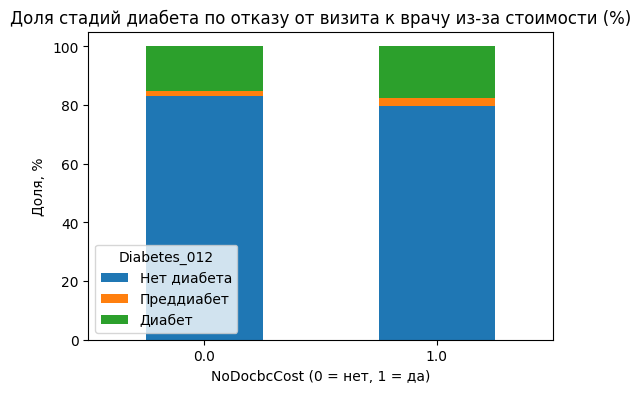

Diabetes_012         0.0       1.0        2.0
AnyHealthcare                                
0.0            86.474054  2.049875  11.476071
1.0            82.496895  2.012512  15.490593


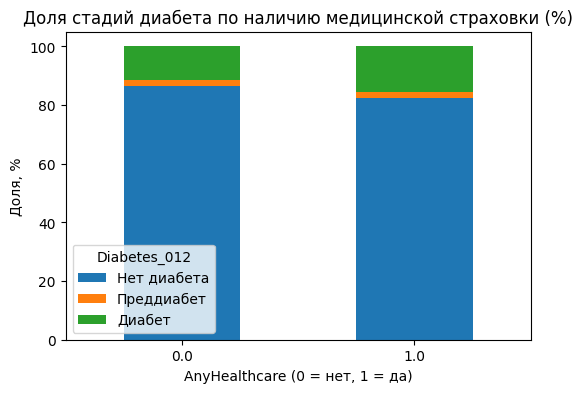

In [17]:
#NoDocbcCost
nodoc_cross = df.groupby(['NoDocbcCost', 'Diabetes_012']).size().unstack()
nodoc_cross_pct = nodoc_cross.div(nodoc_cross.sum(axis=1), axis=0) * 100
print(nodoc_cross_pct)

nodoc_cross_pct.plot(kind='bar', stacked=True, figsize=(6,4))
plt.title('Доля стадий диабета по отказу от визита к врачу из-за стоимости (%)')
plt.xlabel('NoDocbcCost (0 = нет, 1 = да)')
plt.ylabel('Доля, %')
plt.xticks(rotation=0)
plt.legend(title='Diabetes_012', labels=['Нет диабета', 'Преддиабет', 'Диабет'])
plt.show()

# AnyHealthcare
health_cross = df.groupby(['AnyHealthcare', 'Diabetes_012']).size().unstack()
health_cross_pct = health_cross.div(health_cross.sum(axis=1), axis=0) * 100
print(health_cross_pct)

health_cross_pct.plot(kind='bar', stacked=True, figsize=(6,4))
plt.title('Доля стадий диабета по наличию медицинской страховки (%)')
plt.xlabel('AnyHealthcare (0 = нет, 1 = да)')
plt.ylabel('Доля, %')
plt.xticks(rotation=0)
plt.legend(title='Diabetes_012', labels=['Нет диабета', 'Преддиабет', 'Диабет'])
plt.show()

Люди, испытывающие финансовые барьеры при посещении врача, имеют более высокую долю диабета и преддиабета, чем те, кто может позволить визит. Это указывает на возможное влияние доступности медицинской помощи на здоровье населения — ограничение доступа связано с худшим состоянием здоровья.

Люди с медицинской страховкой имеют чуть более высокую долю диабета по сравнению с теми, кто страховки не имеет. Это может быть связано с тем, что страховые пациенты чаще проходят обследования и диагноз ставится чаще, а не обязательно с худшим состоянием здоровья.

Diabetes_012
0.0    6.031786
1.0    5.350832
2.0    5.195829
Name: Income, dtype: float64


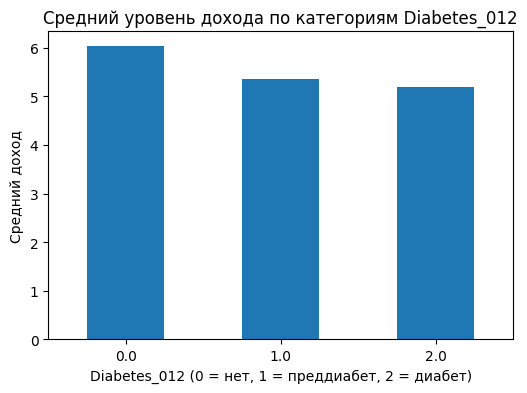

In [18]:
income_by_diabetes = df.groupby('Diabetes_012')['Income'].mean()
print(income_by_diabetes)

income_by_diabetes.plot(kind='bar', figsize=(6,4))
plt.title('Средний уровень дохода по категориям Diabetes_012')
plt.xlabel('Diabetes_012 (0 = нет, 1 = преддиабет, 2 = диабет)')
plt.ylabel('Средний доход')
plt.xticks(rotation=0)
plt.show()

- В группе, которая не сталкивалась с ограничением по стоимости (NoDocbcCost = 0), 84.7% людей не имеют диабета, 1.7% имеют преддиабет, 13.6% — диабет.
- В группе, которая не могла обратиться к врачу из-за стоимости (NoDocbcCost = 1), доля людей без диабета меньше — 79.7%, преддиабет — чуть выше (2.8%), а диабет — выше (17.5%).

Люди, которым не хватало денег на визит к врачу, чаще имеют диабет или преддиабет по сравнению с теми, кто мог посещать врача. Ограничения по стоимости визита к врачу могут быть связаны с более высоким уровнем диабета среди населения.

Средний доход у людей без диабета выше, чем у людей с преддиабетом и диабетом. Наблюдается тенденция: с ростом тяжести состояния доход снижается, что может указывать на связь между более низким доходом и риском развития диабета.

# 5. Распределение индекса массы тела

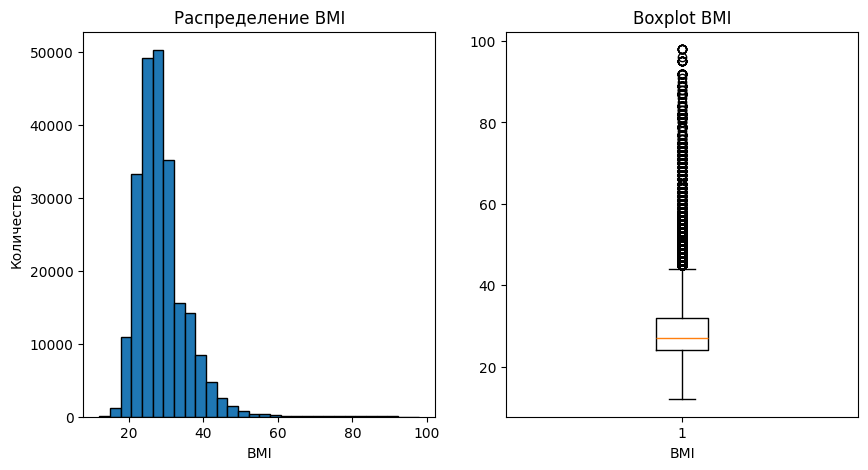

In [19]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(df['BMI'], bins=30, edgecolor='black')
plt.xlabel('BMI')
plt.ylabel('Количество')
plt.title('Распределение BMI')

plt.subplot(1, 2, 2)
plt.boxplot(df['BMI'])
plt.xlabel('BMI')
plt.title('Boxplot BMI')

plt.show()

Гистограмма показывает, что распределение индекса массы тела (BMI) имеет выраженную правостороннюю скошенность. Основная масса значений сосредоточена в диапазоне 20-40, что соответствует категориям от дефицита веса до ожирения второй степени. Основной пик приходится на зону избыточной массы тела (30 BMI), что свидетельствует о том, что наиболее типичным для исследуемых людей является предожирение.

На боксплоте хорошо видны многочисленные выбросы сверху, что указывает на наличие довольно большого количества людей с тяжелыми формами ожирения. Но также наблюдаются выбросы снизу, которые фиксируют случаи выраженного дефицита массы тела.

## Распределение высокого давления и высокого холестерина

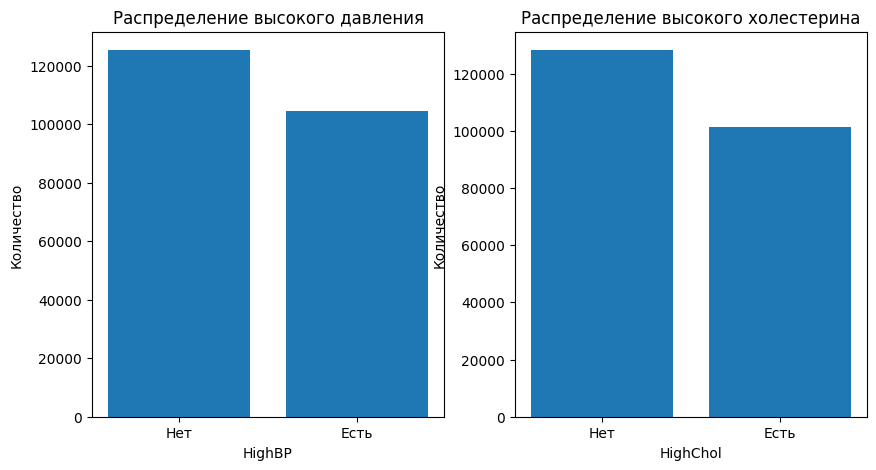

In [20]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
highbp_counts = df['HighBP'].value_counts()
plt.bar(['Нет', 'Есть'], highbp_counts.values)
plt.xlabel('HighBP')
plt.ylabel('Количество')
plt.title('Распределение высокого давления')

plt.subplot(1, 2, 2)
highchol_counts = df['HighChol'].value_counts()
plt.bar(['Нет', 'Есть'], highchol_counts.values)
plt.xlabel('HighChol')
plt.ylabel('Количество')
plt.title('Распределение высокого холестерина')

plt.show()

Среди исследуемых примерно 124 тысячи человек не имеют высокого давления, а около 103 тысяч страдают от него. Что касается уровня холестерина, то около 126 тысяч человек не имеют его повышенного уровня, в то время как имеют около 102 тысяч.

Такое распределение наблюдений указывает на достаточное количество как групп без факторов риска, так и групп с проблемами с давлением и холестерином, что позволяет проводить корректный сравнительный анализ факторов, связанных с диабетом.

## Взаимосвязь между индексом массы тела и диабетом

/tmp/ipython-input-180501845.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([no_diabetes, with_diabetes], labels=['Нет диабета', 'Диабет/преддиабет'])


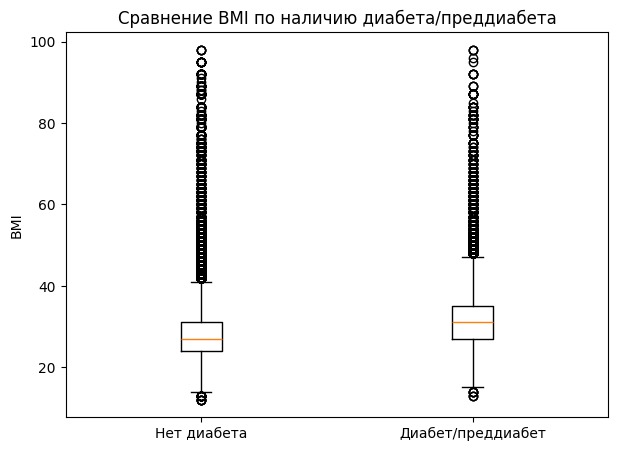

In [21]:
plt.figure(figsize=(7, 5))
no_diabetes = df[df['Diabetes_012'] == 0]['BMI']
with_diabetes = df[df['Diabetes_012'].isin([1, 2])]['BMI']
plt.boxplot([no_diabetes, with_diabetes], labels=['Нет диабета', 'Диабет/преддиабет'])
plt.ylabel('BMI')
plt.title('Сравнение BMI по наличию диабета/преддиабета')

plt.show()

Группа без диабета с медианой BMI 27.0 находится в категории избыточной массы тела (предожирение). Преддиабет и диабет с медианой около 30.0 достигают категории ожирения первой степени. Наблюдаем увеличение индекса массы тела на 3-4 единицы при переходе от здорового состояния к заболеванию.

## Взаимосвязь между высоким давлением и диабетом

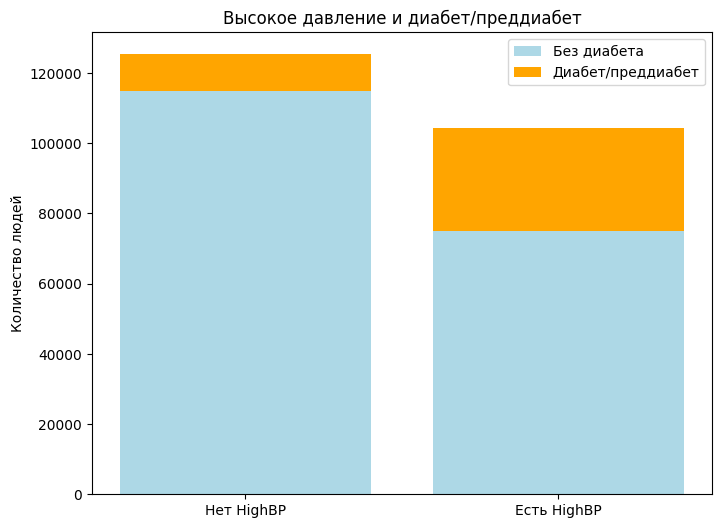

In [22]:
contingency_table_bp = pd.crosstab(df['HighBP'], df['Diabetes_012'])
diagnosis = contingency_table_bp[1] + contingency_table_bp[2]

plt.figure(figsize=(8, 6))
plt.bar([0, 1], contingency_table_bp[0], label='Без диабета', color='lightblue')
plt.bar([0, 1], diagnosis, bottom=contingency_table_bp[0], label='Диабет/преддиабет', color='orange')
plt.xticks([0, 1], ['Нет HighBP', 'Есть HighBP'])
plt.ylabel('Количество людей')
plt.title('Высокое давление и диабет/преддиабет')
plt.legend()

plt.show()

На графике видно, что среди людей с высоким артериальным давлением доля пациентов с диабетом или преддиабетом заметно выше, чем среди людей без гипертонии.

## Взаимосвязь между высоким холестерином и диабетом

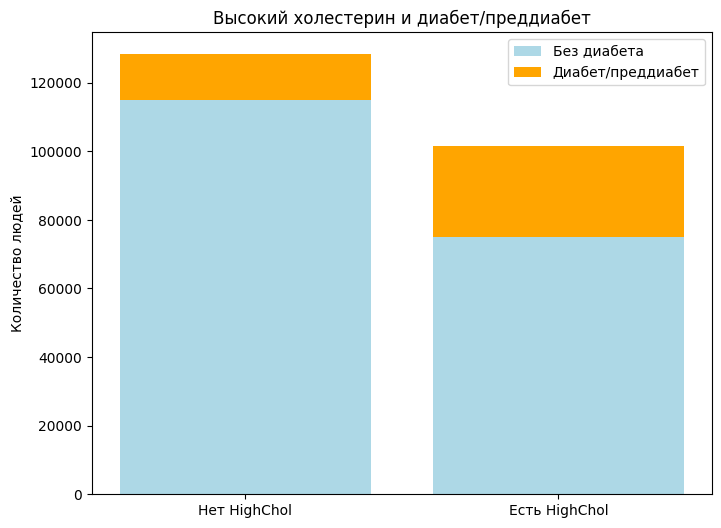

In [23]:
contingency_table = pd.crosstab(df['HighChol'], df['Diabetes_012'])
diagnosis = contingency_table[1] + contingency_table[2]

plt.figure(figsize=(8, 6))
plt.bar([0, 1], contingency_table[0], label='Без диабета', color='lightblue')
plt.bar([0, 1], diagnosis, bottom=contingency_table[0], label='Диабет/преддиабет', color='orange')
plt.xticks([0, 1], ['Нет HighChol', 'Есть HighChol'])
plt.ylabel('Количество людей')
plt.title('Высокий холестерин и диабет/преддиабет')
plt.legend()

plt.show()

Здесь также заметим, что среди людей с высоким холестерином доля пациентов с диабетом или преддиабетом выше, чем среди людей без этого показателя.

# 6. Частотные распределения (PhysActivity, Smoker, HvyAlcoholCons)

PhysActivity
1.0    73.33548
0.0    26.66452
Name: proportion, dtype: float64


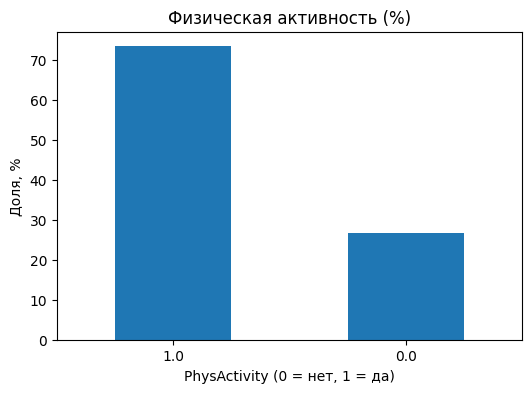

Smoker
0.0    53.433922
1.0    46.566078
Name: proportion, dtype: float64


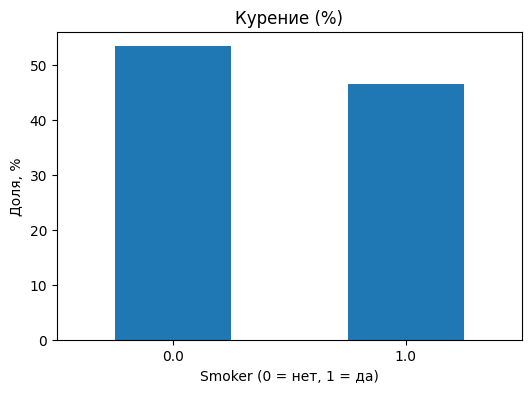

HvyAlcoholConsump
0.0    93.929002
1.0     6.070998
Name: proportion, dtype: float64


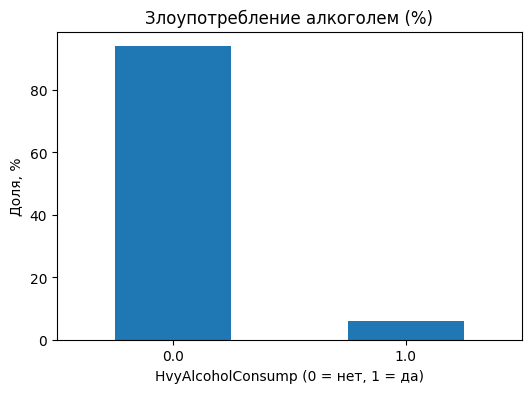

In [24]:
#PhysActivity
phys_dist = df['PhysActivity'].value_counts(normalize=True) * 100
print(phys_dist)

phys_dist.plot(kind='bar', figsize=(6,4))
plt.title('Физическая активность (%)')
plt.xlabel('PhysActivity (0 = нет, 1 = да)')
plt.ylabel('Доля, %')
plt.xticks(rotation=0)
plt.show()

#Smoker
smoker_dist = df['Smoker'].value_counts(normalize=True) * 100
print(smoker_dist)

smoker_dist.plot(kind='bar', figsize=(6,4))
plt.title('Курение (%)')
plt.xlabel('Smoker (0 = нет, 1 = да)')
plt.ylabel('Доля, %')
plt.xticks(rotation=0)
plt.show()

#HvyAlcoholCons
alcohol_dist = df['HvyAlcoholConsump'].value_counts(normalize=True) * 100
print(alcohol_dist)

alcohol_dist.plot(kind='bar', figsize=(6,4))
plt.title('Злоупотребление алкоголем (%)')
plt.xlabel('HvyAlcoholConsump (0 = нет, 1 = да)')
plt.ylabel('Доля, %')
plt.xticks(rotation=0)
plt.show()

Большинство участников ведут относительно здоровый образ жизни: около 76% занимаются физической активностью, 55% не курят, и 94% не злоупотребляют алкоголем. Тем не менее, значительная часть людей всё ещё курит (44%) и часть респондентов (5–6%) злоупотребляет алкоголем, что указывает на потенциальные риски для здоровья в этих группах.

## Доля Diabetes_012 внутри категорий PhysActivity, Smoker, HvyAlcoholCons

Diabetes_012        0.0       1.0        2.0
PhysActivity                                
0.0           76.290191  2.430227  21.279582
1.0           85.046080  1.863380  13.090540


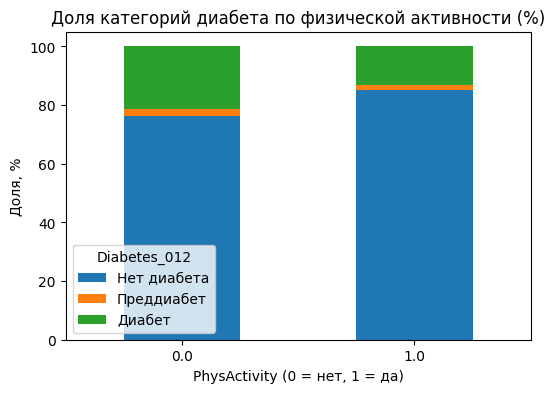

Diabetes_012        0.0       1.0        2.0
Smoker                                      
0.0           84.344483  1.912348  13.743169
1.0           80.837383  2.131776  17.030841


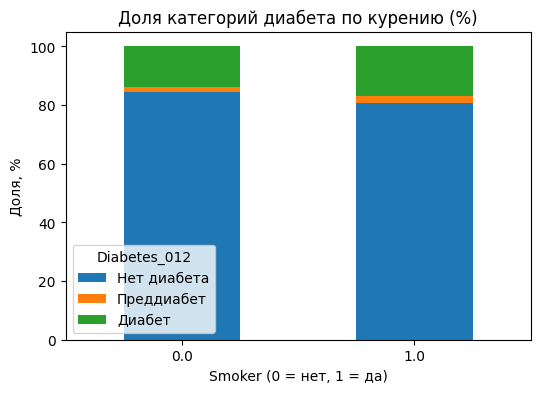

Diabetes_012             0.0       1.0        2.0
HvyAlcoholConsump                                
0.0                82.075791  2.048362  15.875847
1.0                92.544803  1.491039   5.964158


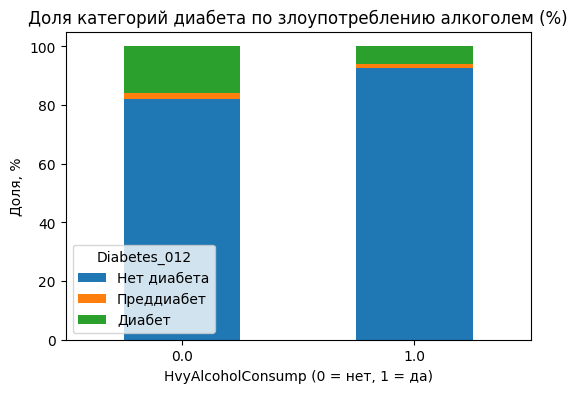

In [25]:
#PhysActivity
phys_tab = df.groupby(['PhysActivity', 'Diabetes_012']).size().unstack()
phys_tab_pct = phys_tab.div(phys_tab.sum(axis=1), axis=0) * 100
print(phys_tab_pct)


phys_tab_pct.plot(kind='bar', stacked=True, figsize=(6,4))
plt.title('Доля категорий диабета по физической активности (%)')
plt.xlabel('PhysActivity (0 = нет, 1 = да)')
plt.ylabel('Доля, %')
plt.xticks(rotation=0)
plt.legend(title='Diabetes_012', labels=['Нет диабета', 'Преддиабет', 'Диабет'])
plt.show()


#Smoker
smoker_tab = df.groupby(['Smoker', 'Diabetes_012']).size().unstack()
smoker_tab_pct = smoker_tab.div(smoker_tab.sum(axis=1), axis=0) * 100
print(smoker_tab_pct)

smoker_tab_pct.plot(kind='bar', stacked=True, figsize=(6,4))
plt.title('Доля категорий диабета по курению (%)')
plt.xlabel('Smoker (0 = нет, 1 = да)')
plt.ylabel('Доля, %')
plt.xticks(rotation=0)
plt.legend(title='Diabetes_012', labels=['Нет диабета', 'Преддиабет', 'Диабет'])
plt.show()


#HvyAlcoholConsump
alcohol_tab = df.groupby(['HvyAlcoholConsump', 'Diabetes_012']).size().unstack()
alcohol_tab_pct = alcohol_tab.div(alcohol_tab.sum(axis=1), axis=0) * 100
print(alcohol_tab_pct)

alcohol_tab_pct.plot(kind='bar', stacked=True, figsize=(6,4))
plt.title('Доля категорий диабета по злоупотреблению алкоголем (%)')
plt.xlabel('HvyAlcoholConsump (0 = нет, 1 = да)')
plt.ylabel('Доля, %')
plt.xticks(rotation=0)
plt.legend(title='Diabetes_012', labels=['Нет диабета', 'Преддиабет', 'Диабет'])
plt.show()

- Физическая активность связана с более низкой долей диабета: среди физически активных респондентов доля диабета и преддиабета заметно ниже, чем среди неактивных. Это согласуется с медицинскими и поведенческими исследованиями и указывает на потенциальную защитную роль физической активности.
- Курение связано с более высокой долей диабета: среди курящих респондентов доля диабета выше по сравнению с некурящими, что может отражать общее негативное влияние курения на здоровье.
- Злоупотребление алкоголем показывает нетривиальный результат: в данных доля диабета ниже среди респондентов, злоупотребляющих алкоголем. Однако данный эффект, вероятнее всего, объясняется особенностями выборки и влиянием сопутствующих факторов (возраст, состояние здоровья, отказ от алкоголя после постановки диагноза), а не реальным защитным эффектом алкоголя.

Поведенческие факторы связаны с различиями в распространённости диабета, однако характер этой связи неоднороден. Наиболее устойчивую и интерпретируемую зависимость демонстрирует физическая активность, тогда как результаты по алкоголю требуют осторожной интерпретации и дальнейшей статистической проверки.

# 7. Комбинаторные срезы
Цель — оценить, как доля людей с  деабетом (Diabetes_binary = 1) различается между подгруппами по возрасту, BMI(ожирение) и двум факторам: физическая активность и финансовый барьер к врачу.

In [26]:
df_my = df_unique.copy()

In [27]:
# Целевая: 1 — диабет (Diabetes_012 = 2), 0 — иначе
df_my["Diabetes_binary"] = (df_my["Diabetes_012"] == 2).astype(int)

df_my["age_group"] = np.where(df_my["Age"] >= 7, "Age ≥ 55", "Age < 55")

df_my["bmi_group"] = np.where(df_my["BMI"] >= 30, "BMI ≥ 30", "BMI < 30")

cols_needed = ["Diabetes_binary", "PhysActivity", "NoDocbcCost", "age_group", "bmi_group"]
print(df_my[cols_needed].isna().sum())

Diabetes_binary    0
PhysActivity       0
NoDocbcCost        0
age_group          0
bmi_group          0
dtype: int64


- Возрастные группы: Age < 55 и Age ≥ 55 (в датасете переменная Age закодирована категориями: 55+ соответствует Age ≥ 7).
- Группы BMI: BMI < 30 и BMI ≥ 30 (порог ожирения).
- Показатель интереса: доля диабета в группе рассчитывается как среднее значение Diabetes_binary (для бинарной переменной это эквивалентно доле единиц).

PhysActivity × BMI group: сравнение доли Diabetes_binary = 1 между физически активными и неактивными отдельно в группах BMI < 30 и BMI ≥ 30.

NoDocbcCost × Age group: сравнение доли Diabetes_binary = 1 между людьми с финансовым барьером к врачу и без него отдельно в группах Age < 55 и Age ≥ 55.

In [28]:
# Доля диабета = среднее Diabetes_binary внутри группы
tab_pa_bmi = (df_my
              .groupby(["PhysActivity", "bmi_group"])["Diabetes_binary"]
              .agg(['mean', 'count'])
              .reset_index()
              .rename(columns={'mean': 'diabetes_share', 'count': 'n'}))#n — количество наблюдений в соответствующей группе.

# Переводим 0/1 в понятные подписи
tab_pa_bmi["PhysActivity"] = tab_pa_bmi["PhysActivity"].map({1: "Физ. активность: Да",
                                                             0: "Физ. активность: Нет"})

tab_pa_bmi

,PhysActivity,bmi_group,diabetes_share,n
0,Физ. активность: Нет,BMI < 30,0.138213,33065
1,Физ. активность: Нет,BMI ≥ 30,0.300230,28205
2,Физ. активность: Да,BMI < 30,0.090128,111774
3,Физ. активность: Да,BMI ≥ 30,0.211238,56737


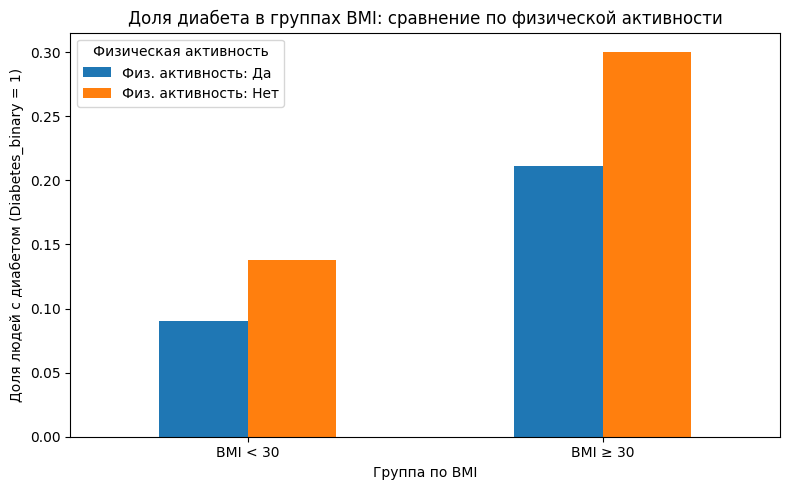

,bmi_group,PhysActivity,diabetes_share,n
0,BMI < 30,Физ. активность: Нет,0.138213,33065
1,BMI ≥ 30,Физ. активность: Нет,0.300230,28205
2,BMI < 30,Физ. активность: Да,0.090128,111774
3,BMI ≥ 30,Физ. активность: Да,0.211238,56737


In [29]:
# Таблица для графика: строки — BMI-группы, столбцы — физ. активность
p1 = tab_pa_bmi.pivot(index="bmi_group", columns="PhysActivity", values="diabetes_share")

ax = p1.plot(kind="bar", figsize=(8, 5))
plt.ylabel("Доля людей с диабетом (Diabetes_binary = 1)")
plt.xlabel("Группа по BMI")
plt.title("Доля диабета в группах BMI: сравнение по физической активности")
plt.xticks(rotation=0)
plt.legend(title="Физическая активность")
plt.tight_layout()
plt.show()

# Размеры групп n для понимания
tab_pa_bmi[["bmi_group", "PhysActivity", "diabetes_share", "n"]]

- В группе BMI ≥ 30 доля диабета заметно выше, чем в BMI < 30.
- Внутри каждой BMI-группы у людей с физической активностью “Да” доля диабета ниже, чем у “Нет”.
- Разница между “Да/Нет” особенно заметна при BMI ≥ 30.

Гипотезы:
H1 (ожирение):

- У людей с BMI ≥ 30 доля диабета выше, чем у людей с BMI < 30.

H2 (активность):

- У физически активных людей доля диабета ниже, чем у неактивных.

H3 (взаимодействие, “сложная”):

- Эффект физической активности сильнее у людей с BMI ≥ 30: разница в доле диабета между активными и неактивными больше в группе ожирения.

In [30]:
tab_cost_age = (df_my
                .groupby(["NoDocbcCost", "age_group"])["Diabetes_binary"]
                .agg(diabetes_share="mean", n="count")
                .reset_index())

tab_cost_age["NoDocbcCost"] = tab_cost_age["NoDocbcCost"].map({
    0: "Барьер по стоимости: Нет",
    1: "Барьер по стоимости: Да"
})

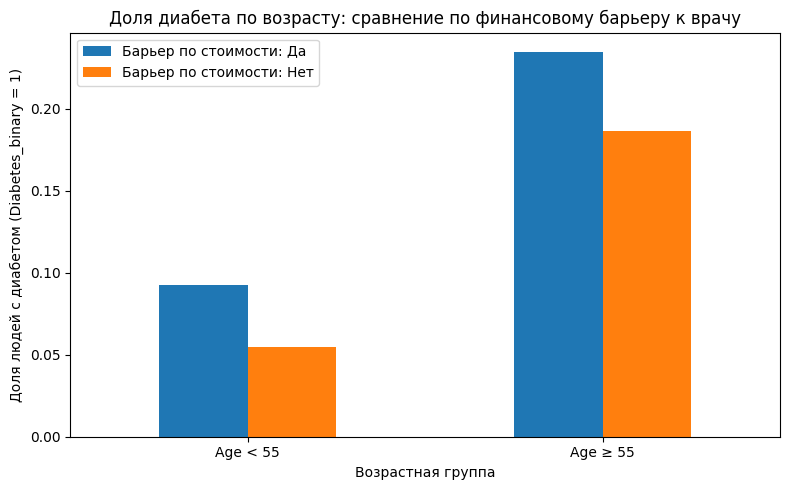

,age_group,NoDocbcCost,diabetes_share,n
0,Age < 55,Барьер по стоимости: Нет,0.054513,57289
1,Age ≥ 55,Барьер по стоимости: Нет,0.186762,151166
2,Age < 55,Барьер по стоимости: Да,0.092595,8899
3,Age ≥ 55,Барьер по стоимости: Да,0.234811,12427


In [31]:
p2 = tab_cost_age.pivot(index="age_group", columns="NoDocbcCost", values="diabetes_share")

ax = p2.plot(kind="bar", figsize=(8, 5))
plt.ylabel("Доля людей с диабетом (Diabetes_binary = 1)")
plt.xlabel("Возрастная группа")
plt.title("Доля диабета по возрасту: сравнение по финансовому барьеру к врачу")
plt.xticks(rotation=0)
plt.legend(title="")
plt.tight_layout()
plt.show()

# таблица с n
tab_cost_age[["age_group", "NoDocbcCost", "diabetes_share", "n"]]

- В группе Age ≥ 55 доля диабета сильно выше, чем в Age < 55.
- В обеих возрастных группах те, кто отвечал “не смог позволить врача (стоимость)”, имеют более высокую долю диабета.
- И у 55+ эта доля в целом выше в обоих столбиках.

Гипотезы

H4 (возраст):

- У людей в группе Age ≥ 55 доля диабета выше, чем у людей Age < 55.

H5 (барьер по стоимости):

- У людей, которые не смогли посетить врача из-за стоимости (NoDocbcCost=Yes), доля диабета выше, чем у тех, у кого такого барьера не было.

H6 (сложная):

- Разница “NoDocbcCost Yes vs No” сильнее выражена в группе Age ≥ 55 (то есть возраст усиливает связь барьера с диабетом).

# 8. Корреляционный анализ

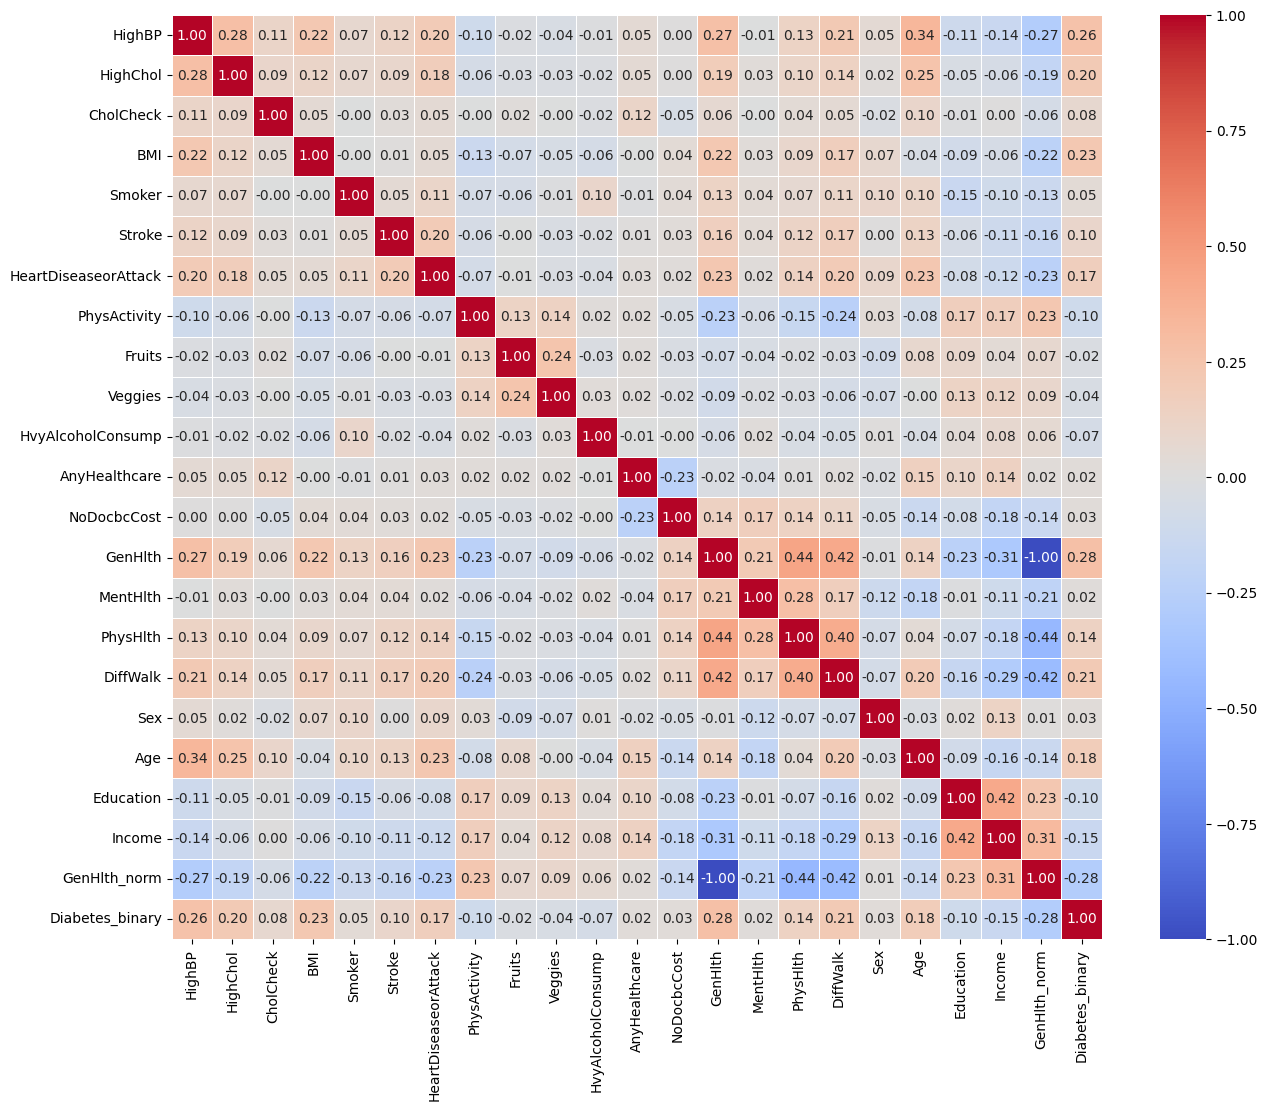

In [32]:
predictor_columns = [col for col in df.columns if col not in ['Diabetes_012', 'Diabetes_binary'] and df[col].dtype in [np.float64, np.int64]]
columns_for_corr = predictor_columns + ['Diabetes_binary']
correlation_matrix = df[columns_for_corr].corr(method='spearman')

plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix,
            annot=True,
            fmt=".2f",
            cmap='coolwarm',
            center=0,
            linewidths=0.5)

plt.show()

Проведённый корреляционный анализ показал, что наиболее сильную корреляцию с Diabetes_binary имеет GenHlth (0.28), что указывает на то, что ухудшение оценки здоровья ассоциировано с более высокой вероятностью наличия диабета. Положительную связь с диабетом также демонстрируют клинически значимые факторы, такие как наличие высокого артериального давления (0.26), индекс массы тела (0.23) и повышенный уровень холестерина (0.20). Также диабет связан с функциональными ограничениями (0.21) и возрастом (0.18), отражая накопительный характер риска с течением времени.

Общая оценка здоровья - GenHlth, PhysHlth - число дней с плохим физическим здоровьем за последние 30 дней и DiffWalk - наличие серьёзных трудностей при ходьбе или подъёме по лестнице демонстрируют умеренные взаимные корреляции: между GenHlth и PhysHlth (0.44), между PhysHlth и DiffWalk (0.40), а также между GenHlth и DiffWalk (0.42). Эти связи отражают частичное дублирование информации о состоянии здоровья и функциональных ограничениях и являются ожидаемыми. Кроме того, умеренная положительная корреляция наблюдается между показателями Education и Income (r ≈ 0.42), что отражает типичную зависимость между уровнем образования и дохода. При этом величины корреляций не достигают критических значений, что свидетельствует об отсутствии выраженной мультиколлинеарности.

## Выдвигаемые гипотезы

В ходе анализа результатов было выявлено, что среди людей с повышенным артериальным давлением доля пациентов с диабетом или преддиабетом заметно выше, чем среди лиц без гипертонии. Данная закономерность наблюдается как на визуализациях распределений, так и подтверждается результатами корреляционного анализа, выявившего умеренную положительную связь между этими параметрами.

На основе этого была выдвинута гипотеза о том, что **доля людей с диабетом или преддиабетом выше среди лиц с повышенным артериальным давлением по сравнению с людьми без него.**

С бизнес-точки зрения полученный результат представляет значительный интерес, поскольку люди с гипертонией могут рассматриваться как приоритетная целевая группа для профилактических и диагностических программ. Это открывает возможности для разработки и внедрения персонализированных программ скрининга, мониторинга показателей здоровья и коррекции образа жизни.

Также было выявлено, что ухудшение общего состояния здоровья (GenHlth) связано с более высокой вероятностью наличия диабета, тк данный показатель демонстрирует наиболее сильную корреляцию с Diabetes_binary среди всех рассмотренных признаков. Также интересно, что GenHlth умеренно коррелирует с числом дней с плохим физическим здоровьем (PhysHlth) и наличием серьёзных трудностей при ходьбе (DiffWalk), что указывает на комплексное ухудшение физического и функционального состояния, сопровождающее рост риска диабета.

Выдвигаемая гипотеза: **люди с худшей самооценкой общего состояния здоровья (GenHlth) имеют более высокую вероятность наличия диабета или преддиабета по сравнению с людьми с лучшей оценкой общего здоровья.**

С практической и бизнес-точки зрения это позволяет использовать субъективные оценки состояния здоровья людей как простой инструмент предварительного скрининга. Такие показатели могут быть эффективно интегрированы в маркетинговые стратегии, например в виде опросников или рекламных сообщений, ориентированных на людей, отмечающих ухудшение самочувствия или подвижности, с целью мотивировать их пройти раннее обследование в клинике.

## Исследование гипотез ##

**ГИПОТЕЗА 1**

На основе того, что в в нашем датасете есть 13 различных возрастных групп, у которых могут различаться факторы, а также из-за смещенности вправо распределения возрастов мы решили проверить, влияет ли возраст на наличие диабета.

*H0: распределение Diabetes_binary одинаково во всех возрастных группах.*

*H1: распределение Diabetes_binary различается между возрастными группами и демонстрирует рост с увеличением возраста.*

In [33]:
import statsmodels.formula.api as smf
#логистическая регрессия
model = smf.logit("Diabetes_binary ~ C(Age)", data=df).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.437708
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:        Diabetes_binary   No. Observations:               229781
Model:                          Logit   Df Residuals:                   229768
Method:                           MLE   Df Model:                           12
Date:                Sat, 20 Dec 2025   Pseudo R-squ.:                 0.04936
Time:                        09:20:38   Log-Likelihood:            -1.0058e+05
converged:                       True   LL-Null:                   -1.0580e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -4.0014      0.101    -39.455      0.000      -4.200      -3.803
C(Age)[T.2.0]    

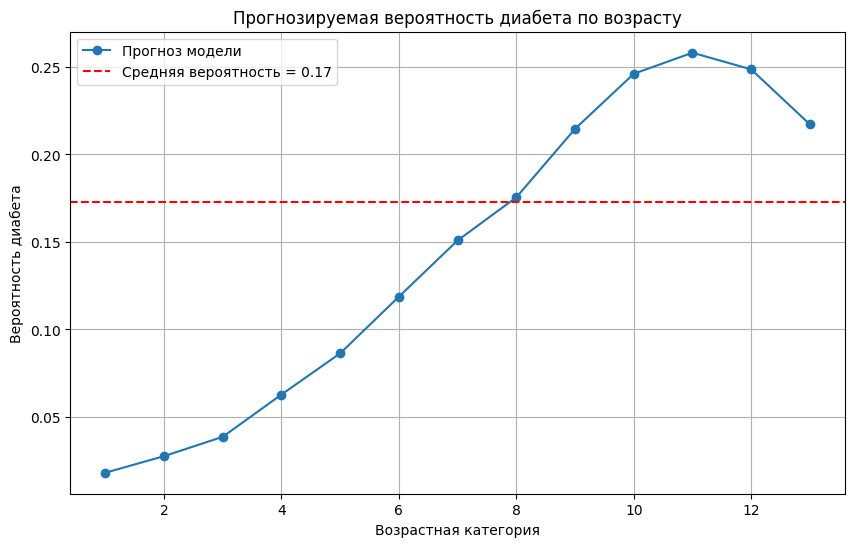

In [34]:
ages = sorted(df['Age'].unique())

pred_df = pd.DataFrame({'Age': ages})

#модель для предсказания вероятностей
pred_df['pred_prob'] = model.predict(pred_df)
mean_prob = df['Diabetes_binary'].mean() #среднее по вероятсности риска
plt.figure(figsize=(10,6))
plt.plot(pred_df['Age'], pred_df['pred_prob'], marker='o', label='Прогноз модели')

#линия средней вероятности
plt.axhline(mean_prob, color='red', linestyle='--', label=f'Средняя вероятность = {mean_prob:.2f}')

plt.xlabel('Возрастная категория')
plt.ylabel('Вероятность диабета')
plt.title('Прогнозируемая вероятность диабета по возрасту')
plt.grid(True)
plt.legend()
plt.show()

Для проверки зависимости вероятности диабета от возрастамы мы использовали логистическую регрессию. Мы выбрали этот метод, поскольку он позволяет количественно оценить влияние возраста на риск заболевания и контролировать различия между группами.

Результаты показывают, что H0 отклоняется, так как коэффициенты возраста статистически значимы (p < 0.05 во всех столбцах P>|z|) и показывают рост вероятности диабета с возрастом, что особенно заметно в категориях 55 лет и старше (Age 8+), где риск значительно превышает среднее значение по выборке.

**ГИПОТЕЗА 2**

По итогам визуального анализа и сводных таблиц по комбинированным срезам (возраст, барьер по стоимости обращения к врачу) стало заметно, что у респондентов старше 55 лет значения целевой переменной Diabetes_012 чаще смещены в сторону более “тяжёлого” состояния (преддиабет/диабет), и одновременно в этой группе сильнее проявляется различие между людьми, которые отмечали финансовые ограничения при обращении к врачу (NoDocbcCost = 1), и теми, у кого такого барьера не было (NoDocbcCost = 0). Это наблюдение логично интерпретируется как возможная связь между ограниченным доступом к медицинской помощи и риском диабета у людей старшего возраста.

**На основе этого была сформулирована гипотеза для проверки:**

*H0 (нулевая гипотеза): среди респондентов 55+ распределение целевой переменной Diabetes_012=2(наличие диабета) не различается между группами NoDocbcCost = 1 и NoDocbcCost = 0 (финансовый барьер не связан с наличием/уровнем диабета).*

*H1 (альтернативная гипотеза): среди респондентов 55+ распределение Diabetes_012=2(наличие диабета) различается между группами NoDocbcCost = 1 и NoDocbcCost = 0 (финансовый барьер связан с наличием/уровнем диабета).*


In [35]:
from scipy.stats import chi2_contingency

df45 = df_my[df_my["Age"] >= 8].copy()

# 2) "Нормировка": делаем одинаковое число людей в каждой возрастной категории Age
n_min = df45["Age"].value_counts().min()
df45_bal = df45.groupby("Age", group_keys=False).apply(lambda x: x.sample(n_min, random_state=42))

print("Проверка баланса:")
print(df45_bal["Age"].value_counts().sort_index())


Проверка баланса:
Age
8.0     15394
9.0     15394
10.0    15394
11.0    15394
12.0    15394
13.0    15394
Name: count, dtype: int64


/tmp/ipython-input-3339000673.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df45_bal = df45.groupby("Age", group_keys=False).apply(lambda x: x.sample(n_min, random_state=42))


Мы выровняли число наблюдений в возрастных подкатегориях 55+ (Age=7–13), чтобы итоговый результат не определялся самой многочисленной возрастной группой. После этого проверили связь NoDocbcCost и Diabetes_012 на сбалансированной выборке.

Для проверки сформулированной гипотезы был выбран **χ²-тест** независимости.

Выбор данного теста обусловлен тем, что оба анализируемых признака являются категориальными:
- Diabetes_012 — категориальная переменная с тремя уровнями (нет диабета, преддиабет, диабет);
- NoDocbcCost — бинарная переменная, отражающая наличие или отсутствие финансового барьера при обращении к врачу.

Цель анализа заключается в проверке того, связано ли распределение статуса диабета с наличием финансовых ограничений. χ²-тест позволяет оценить статистическую зависимость между такими признаками. Кроме того, объём выборки респондентов в возрасте 45 лет и старше является достаточным для корректного применения данного теста.

In [36]:
ct = pd.crosstab(df45_bal["NoDocbcCost"], df45_bal["Diabetes_012"])
chi2, p, dof, exp = chi2_contingency(ct)

print(ct)
print("\np-value =", p)

Diabetes_012    0.0   1.0    2.0
NoDocbcCost                     
0.0           67434  2140  17127
1.0            4081   183   1399

p-value = 2.2805506490244218e-22


По результатам χ²-теста независимости для респондентов 45+ было получено значение **p-value = 5.0424931431064505e-15**, что существенно меньше стандартного уровня значимости 0.05.

В связи с этим нулевая гипотеза была отвергнута.

In [37]:
# Направление эффекта для H1: сравним долю диабета
df45_bal["has_diabetes"] = (df45_bal["Diabetes_012"] == 2).astype(int)
print("Доля диабета (Diabetes_012=2) по NoDocbcCost:")
print(df45_bal.groupby("NoDocbcCost")["has_diabetes"].mean().rename({0: "Нет барьера", 1: "Есть барьер"}))

Доля диабета (Diabetes_012=2) по NoDocbcCost:
NoDocbcCost
Нет барьера    0.197541
Есть барьер    0.247042
Name: has_diabetes, dtype: float64


Для интерпретации направления выявленной связи были дополнительно рассчитаны доли респондентов с диагностированным диабетом (Diabetes_012 = 2) в группах, различающихся по признаку финансового барьера при обращении к врачу (NoDocbcCost).

Анализ сбалансированной выборки показал, что доля диабета выше среди респондентов, указавших наличие финансового барьера. Таким образом, среди людей в возрасте 55 лет и старше диабет встречается чаще в группе, которая сообщает о невозможности обратиться к врачу из-за стоимости медицинских услуг. Полученный результат согласуется с альтернативной гипотезой H₁ и дополняет выводы χ²-теста, указывая не только на наличие статистической связи, но и на её направление.

### Общие выводы

Анализ показал, что среди респондентов 55+ диабет встречается чаще у тех, кто сталкивается с финансовым барьером при обращении к врачу. Это открывает возможность для бизнеса:
 1. Профилактические и диагностические программы. Можно организовать check-up дни или специальные профилактические акции для аудитории 55+, снижая финансовый барьер входа.
 2. Повышение вовлечённости клиентов. Такие инициативы помогут ранней выявляемости заболеваний и стимулируют клиентов к дальнейшему взаимодействию с сервисом, включая регулярное наблюдение и сопутствующие услуги.
 3. Инвестиции в долгосрочную ценность клиента. Ограниченные по времени скидки на диагностику рассматриваются не как прямые издержки, а как способ привлечения и удержания высокоценной аудитории.
Таким образом, бизнес может использовать данные результаты для разработки стратегий по привлечению и удержанию клиентов, одновременно улучшая доступ к медицинским услугам для целевой возрастной группы.

**ГИПОТЕЗА 3**

*Нулевая гипотеза (H₀):
Доля людей с диабетом или преддиабетом среди лиц с повышенным артериальным давлением не отличается от доли среди лиц без повышенного артериального давления.*

*Альтернативная гипотеза (H₁):
Доля людей с диабетом или преддиабетом выше среди лиц с повышенным артериальным давлением по сравнению с лицами без повышенного артериального давления.*


Для проверки этой гипотезы был использован z-тест для сравнения двух независимых пропорций. Выбор данного статистического теста обусловлен тем, что анализируемый показатель бинарный - принимает только два возможных значения (0 - диабет отсутствует, 1 - диабет или преддиабет присутствует), также сравниваемые группы независимы. Дополнительно, большой объём данных обеспечивает выполнение условий нормальной аппроксимации. Поскольку альтернативная гипотеза сформулирована в направленном виде («доля выше»), для проверки был применён односторонний z-тест.

In [38]:
group_highbp = df[df['HighBP'] == 1]
group_no_highbp = df[df['HighBP'] == 0]

n1 = len(group_highbp)
x1 = group_highbp['Diabetes_binary'].sum()
p1 = x1 / n1

n2 = len(group_no_highbp)
x2 = group_no_highbp['Diabetes_binary'].sum()
p2 = x2 / n2

print(f"Группа с HighBP:")
print(f"  Всего людей: {n1:,}")
print(f"  С диабетом: {x1:,}")
print(f"  Доля: {p1:.3f} ({p1*100:.1f}%)")

print(f"\nГруппа без HighBP:")
print(f"  Всего людей: {n2:,}")
print(f"  С диабетом: {x2:,}")
print(f"  Доля: {p2:.3f} ({p2*100:.1f}%)")

Группа с HighBP:
  Всего людей: 104,422
  С диабетом: 29,317
  Доля: 0.281 (28.1%)

Группа без HighBP:
  Всего людей: 125,359
  С диабетом: 10,409
  Доля: 0.083 (8.3%)


In [39]:
count = [x1, x2]
size = [n1, n2]

z_stat, p_value = proportions_ztest(
    count,
    size,
    alternative='larger'  # односторонний тест
)

z_stat, p_value

(np.float64(124.79799746251685), np.float64(0.0))

In [40]:
alpha = 0.05
if p_value < alpha:
    print("Отвергаем H0")
else:
    print("Нет оснований отвергать H0")

Отвергаем H0


Результаты статистического тестирования позволили отвергнуть нулевую гипотезу. Полученные данные свидетельствуют о наличии статистически значимой положительной связи между повышенным артериальным давлением и риском развития диабета/преддиабета.